In [96]:
import numpy as np 
import pandas as pd 

In [97]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [98]:
data = data.set_index('PassengerId')
data.index.names = [None]
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA

In [99]:
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.impute import KNNImputer


In [100]:
# NULL Values
print('Shape of the data is:-',data.shape)
print('\nNull values in Attributes:-\n',data.isnull().sum())
print('\nNull Values in Target Variable:-',data['Survived'].isnull().sum())

# Datatype of each attribute
print('\nData Type \n',data.dtypes)

Shape of the data is:- (891, 11)

Null values in Attributes:-
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Null Values in Target Variable:- 0

Data Type 
 Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [101]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [102]:
# imputing null values of "Age" and "Cabin" attributes
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Age']=data['Age'].fillna(data['Age'].mean())
data = data.dropna()
print(data.shape)
data.isnull().sum()
data.head()


(889, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Pclass'] = le.fit_transform(data['Pclass'])
data['Sex']=le.fit_transform(data['Sex'])
data['Ticket']=le.fit_transform(data['Ticket'])
data['Cabin']=le.fit_transform(data['Cabin'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,2,"Braund, Mr. Owen Harris",1,22.000000,1,0,522,7.2500,46,2
2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,595,71.2833,80,0
3,1,2,"Heikkinen, Miss. Laina",0,26.000000,0,0,668,7.9250,46,2
4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,48,53.1000,54,2
5,0,2,"Allen, Mr. William Henry",1,35.000000,0,0,471,8.0500,46,2
6,0,2,"Moran, Mr. James",1,29.699118,0,0,274,8.4583,46,1
7,0,0,"McCarthy, Mr. Timothy J",1,54.000000,0,0,84,51.8625,128,2
8,0,2,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,394,21.0750,46,2
9,1,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,343,11.1333,46,2
10,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,131,30.0708,46,0


In [104]:
# Dropping the "Passenger Name" Column
data = data.drop('Name', axis =1)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,2,1,22.0,1,0,522,7.2500,46,2
2,1,0,0,38.0,1,0,595,71.2833,80,0
3,1,2,0,26.0,0,0,668,7.9250,46,2
4,1,0,0,35.0,1,0,48,53.1000,54,2
5,0,2,1,35.0,0,0,471,8.0500,46,2


**Target variable is "Survived" column from the database**

In [105]:
target = data['Survived']
variables = data.drop(['Survived'], axis=1)
variables.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,22.000000,1,0,522,7.2500,46,2
2,0,0,38.000000,1,0,595,71.2833,80,0
3,2,0,26.000000,0,0,668,7.9250,46,2
4,0,0,35.000000,1,0,48,53.1000,54,2
5,2,1,35.000000,0,0,471,8.0500,46,2
6,2,1,29.699118,0,0,274,8.4583,46,1
7,0,1,54.000000,0,0,84,51.8625,128,2
8,2,1,2.000000,3,1,394,21.0750,46,2
9,2,0,27.000000,0,2,343,11.1333,46,2
10,1,0,14.000000,1,0,131,30.0708,46,0


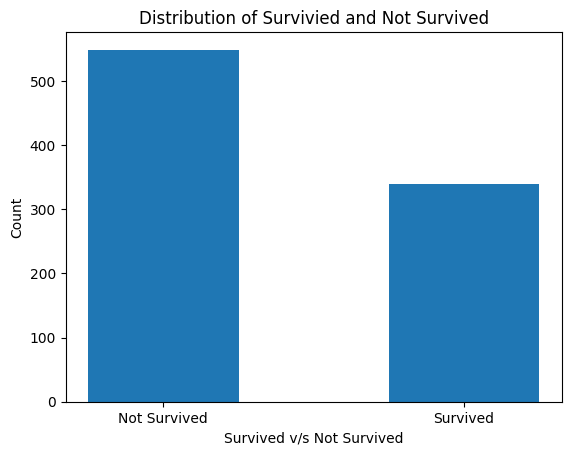

In [106]:
# bar graph
plt.bar(target.value_counts().index,height =target.value_counts().values, width = 0.5)
plt.title('Distribution of Survivied and Not Survived')
plt.xlabel("Survived v/s Not Survived")
plt.xticks([0,1],['Not Survived','Survived'])
plt.ylabel('Count')
plt.show()


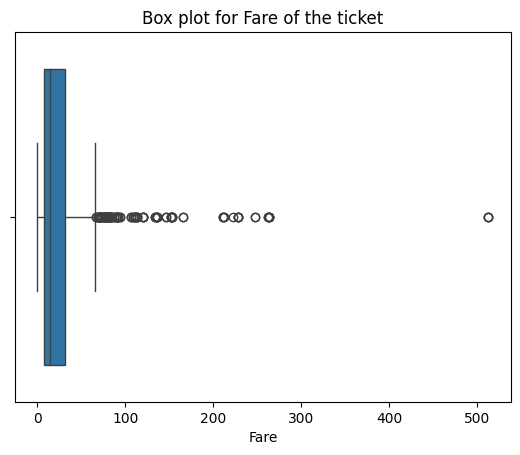

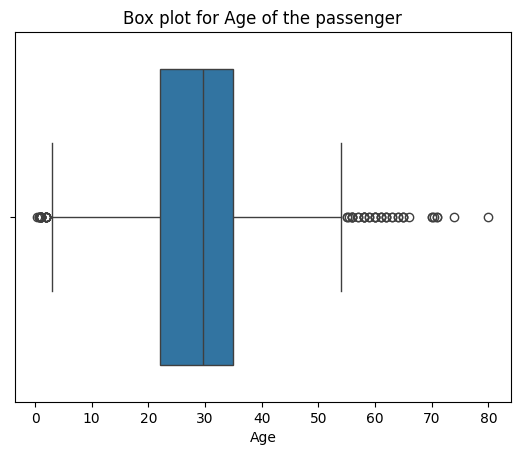

In [107]:
#Boxplot of 'Fair' attribute

sns.boxplot(x = variables['Fare'])
plt.title('Box plot for Fare of the ticket')
plt.show()



#Boxplot of 'Age' attribute

sns.boxplot(x = variables['Age'])
plt.title('Box plot for Age of the passenger')
plt.show()


<Axes: >

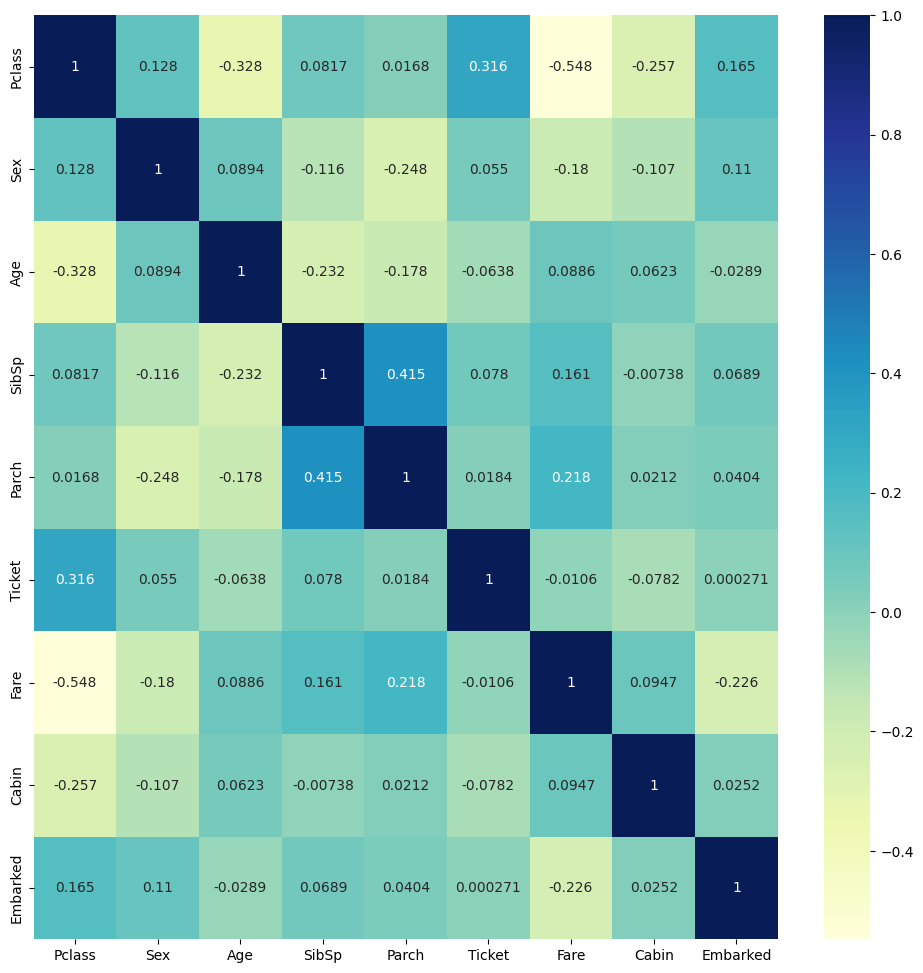

In [108]:
#correlaion heatmap
plt.figure(figsize=(12,12)) 
sns.heatmap(variables.corr(),annot = True, fmt='.3g',cmap='YlGnBu')

In [109]:
# scaling the data
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

var = rs.fit_transform(variables)

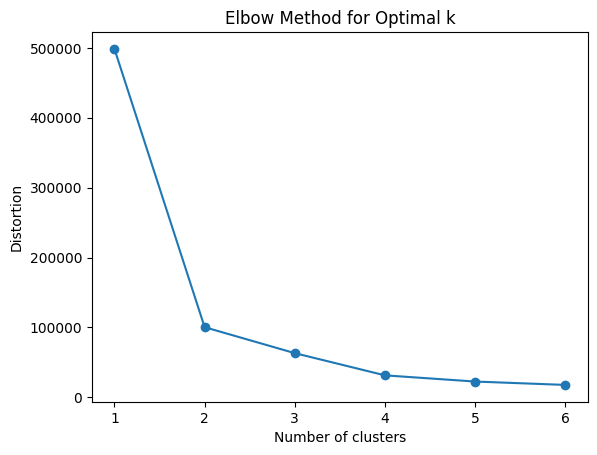

In [110]:
# clustering the scaled data for more model accuracy using the elbow method
from sklearn.cluster import KMeans

elbow=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=30,max_iter=len(var),random_state=100)
    kmeans.fit(var)
    elbow.append(kmeans.inertia_)
    

# Plot the elbow curve
plt.plot(range(1,7), elbow, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [111]:
km_2= KMeans(n_clusters = 2,init='k-means++',max_iter=len(var),random_state = 100)
cluster_lable=kmeans.fit_predict(var)



In [112]:
var_clustered=np.column_stack((var,cluster_lable.reshape(-1,1)))
var_clustered

array([[ 0.        ,  0.        , -0.59223982, ...,  0.        ,
         0.        ,  0.        ],
       [-2.        , -1.        ,  0.63852941, ..., 34.        ,
        -2.        ,  3.        ],
       [ 0.        , -1.        , -0.28454751, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.        ,  0.        , -0.28454751, ..., 13.        ,
        -2.        ,  4.        ],
       [ 0.        ,  0.        ,  0.17699095, ...,  0.        ,
        -1.        ,  0.        ]])

In [113]:
# Builiding ML models
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [114]:
x_train,x_test, y_train, y_test = train_test_split(var_clustered, target, test_size = 0.2, random_state =100)

**1) Logistic Regression**

In [115]:
lor = LogisticRegression(tol=0.005, max_iter = 200,random_state = 100)
lor.fit(x_train,y_train)

LogisticRegression(max_iter=200, random_state=100, tol=0.005)

In [116]:
y_pred_lor = lor.predict(x_test)
log_score=accuracy_score(y_test, y_pred_lor)
print(f"Logistic Regression accuracy: {log_score:.4f}")
confusion_matrix(y_test, y_pred_lor)

Logistic Regression accuracy: 0.8090


array([[99, 15],
       [19, 45]], dtype=int64)

**2) Decision Tree Classifier**

In [117]:
dt = DecisionTreeClassifier(min_samples_split=5,criterion = 'gini',splitter='best',random_state = 100)
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=100)

In [118]:
y_pred_dt = dt.predict(x_test)
dt_score=accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy: {dt_score:.4f}")
confusion_matrix(y_test, y_pred_dt)

Decision Tree accuracy: 0.7921


array([[93, 21],
       [16, 48]], dtype=int64)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


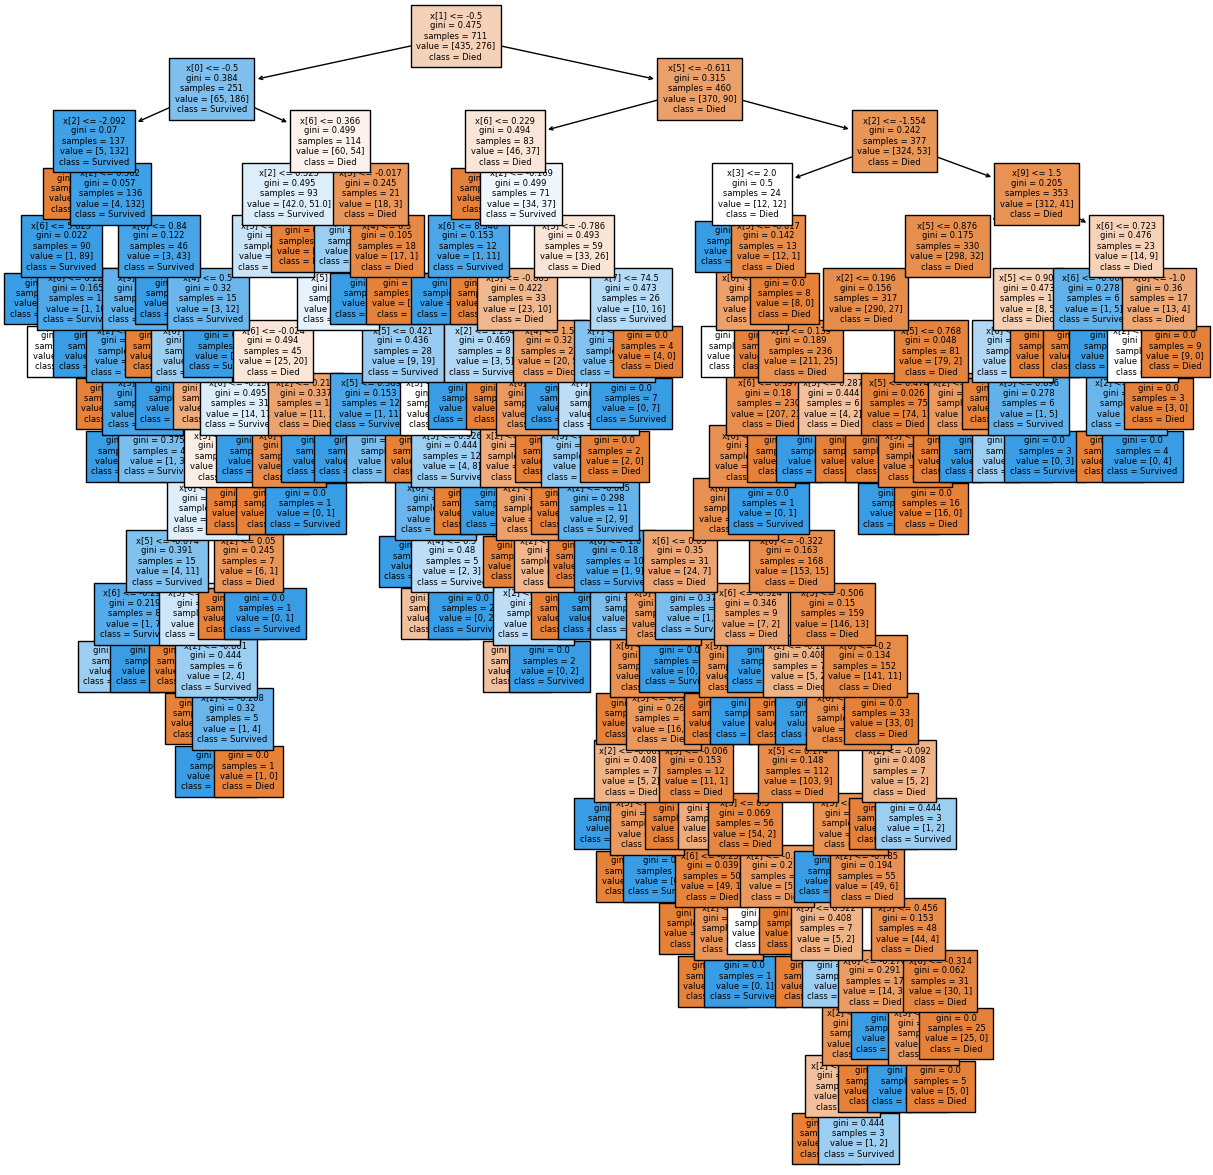

In [119]:
feature=variables.columns
print(feature)
plt.figure(figsize=(15,15))
plot_tree(dt,filled=True,class_names=['Died','Survived'],fontsize=6)
plt.show()

**3) Random Forest Classifier**

In [120]:
rfc = RandomForestClassifier(n_estimators = 50, min_samples_split=2,random_state = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [121]:
y_pred_rfc = rfc.predict(x_test)
rfc_score=accuracy_score(y_test, y_pred_rfc)
print(f"RandomForest accuracy: {rfc_score:.4f}")
confusion_matrix(y_test, y_pred_rfc)

RandomForest accuracy: 0.8427


array([[101,  13],
       [ 15,  49]], dtype=int64)

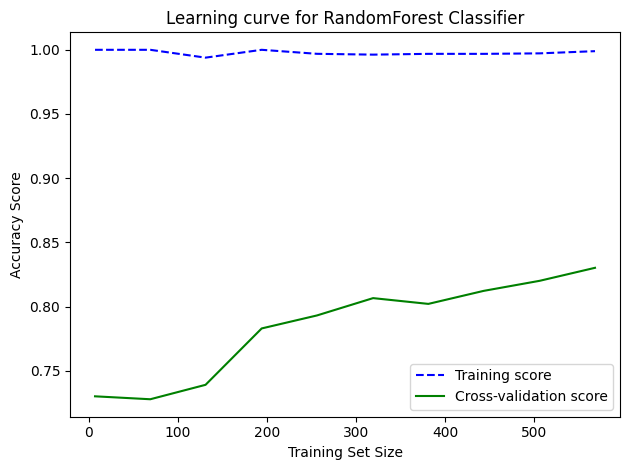

In [122]:
size,train_score,test_score=learning_curve(rfc, var_clustered,target,cv=5,
                                           scoring='accuracy',train_sizes=np.linspace(0.01,.8,10))

train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)

#plotting the learning curve
plt.plot(size, train_mean, '--', color="b",  label="Training score") 
plt.plot(size, test_mean, color="g", label="Cross-validation score") 
plt.title("Learning curve for RandomForest Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

* Out of the three models built, Random Forest Classifier model is better performing with an accuracy of 84.27%.
* While the second best model for the given data is Logisitc Regression with 80.90%

**Thus the model best suited for the data is Random Forest Classifier with patameter given below**
* n_estimators = 50
* min_samples_split=2
* random_state = 100